<a href="https://colab.research.google.com/github/JuuliJ/Machine-learning-and-deep-neural-networks/blob/main/Fruits_Classification_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juliakachanova","key":"04730ca3f36de2ec6ddc57dd7da8e353"}'}

In [ ]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/moltean/fruits/code")

100%|██████████| 1.28G/1.28G [01:02<00:00, 21.9MB/s]


In [ ]:
print(os.listdir("/content/fruits"))

['fruits-360-original-size', 'fruits-360_dataset']


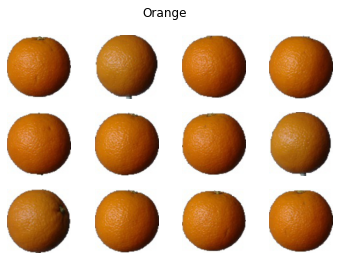

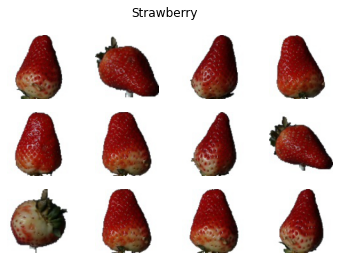

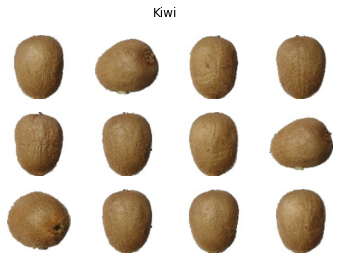

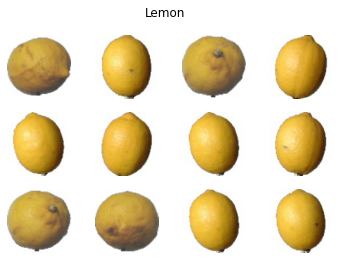

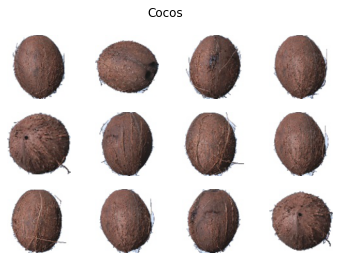

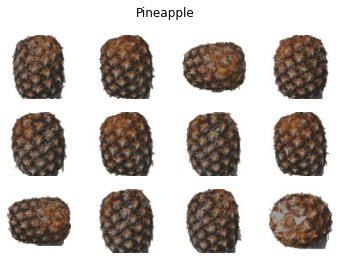

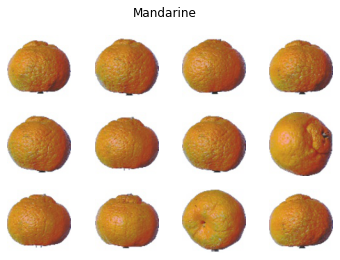

In [ ]:
# фрукты, которые будем классифицировать
fruits = ['Orange', 'Strawberry', 'Kiwi' , 'Lemon', 'Cocos' , 'Pineapple', 'Mandarine']

# для каждого вида фруктов отобразим изображения
for f in fruits:
    fig, _ = plt.subplots(3,4) #строим график с тремя строками и четрьмя столбцами в сетке для каждой категории
    fig.suptitle(f)
    fig.patch.set_facecolor('xkcd:white')
    for k, v in enumerate(os.listdir("/content/fruits/fruits-360_dataset/fruits-360/Training/"+f)[:12]): #Получить в произвольном порядке список имен изображений (где v - название файла) в директории/каталоге,
        img = plt.imread("/content/fruits/fruits-360_dataset/fruits-360/Training/"+f+'/'+v) #Считывание изображения из файла в массив
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [ ]:
# функция получения изображений и числовых меток

def getYourFruits(fruits, data_type):
  # путь до папки, где расположены папки с изображениями по видам фруктов
  path = "/content/fruits/fruits-360_dataset/fruits-360/" + data_type + "/"

  # инициализируем два пустых списка изображений и меток
  images = []
  labels = []
  imagePaths = [] # cписок абсолютных путей к изображениям 

  for i, f  in enumerate(fruits):
      j=0
      for image_path in os.listdir(path+f):
          imagePaths.append([path+f+'/'+image_path, i]) # Добавляем в список в произвольном порядке пути к изображениям для каждой категории
                                                        # i=0 : 'orange', k=1 : 'Strawberry' и т.д.
          j+=1 #подсчет кол-ва изображений каждого вида фруктов
      print(j , " " , data_type.upper(), " изображений " , fruits[i].upper())    

  import random
  random.shuffle(imagePaths) #Cлучайным образом перетасовываем названия изображений в списке путей к изображениям

  # цикл по путям изображений
  for imagePath in imagePaths:
      image = cv2.imread(imagePath[0]) # считывание изображения в массив numpy
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      images.append(image)
      label = imagePath[1]
      labels.append(label)

  images = np.array(images)
  labels = np.array(labels)
  return images, labels

In [ ]:
# получаем изображения и метки обучающих и тестовых наборов данных 
X_train, y_train =  getYourFruits(fruits, 'Training')
X_test, y_test = getYourFruits(fruits, 'Test')

479   TRAINING  изображений  ORANGE
492   TRAINING  изображений  STRAWBERRY
466   TRAINING  изображений  KIWI
492   TRAINING  изображений  LEMON
490   TRAINING  изображений  COCOS
490   TRAINING  изображений  PINEAPPLE
490   TRAINING  изображений  MANDARINE
160   TEST  изображений  ORANGE
164   TEST  изображений  STRAWBERRY
156   TEST  изображений  KIWI
164   TEST  изображений  LEMON
166   TEST  изображений  COCOS
166   TEST  изображений  PINEAPPLE
166   TEST  изображений  MANDARINE


In [ ]:
X_train.shape

(3399, 100, 100, 3)

In [ ]:
y_train.shape

(3399,)

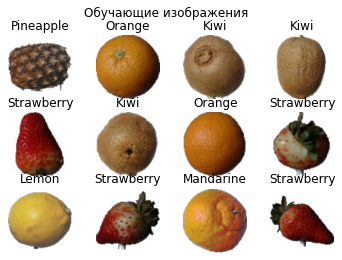

In [ ]:
#Проверим метки изображений
fig, _ = plt.subplots(3,4)
fig.suptitle("Обучающие изображения")
fig.patch.set_facecolor('xkcd:white')
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(fruits[y_train[i]])
plt.show()

In [ ]:
# стандартизация изображений
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # используем метод масштабирования - стандартизацию со следующими параметрами: среднее значение - 0, стандартное отклонение - 1
X_train = scaler.fit_transform([i.flatten() for i in X_train]) #вычисляем и применяем преобразования к обучающему набору данных с помощью fit_transform
X_test = scaler.fit_transform([i.flatten() for i in X_test])

In [ ]:
# проанализируем ошибку в зависимости от числа соседей k
from sklearn.neighbors import KNeighborsClassifier
error = [] # список для значений ошибок при изменении k от 1 до 20
k = range(1, 20)
for i in k: 
  knn = KNeighborsClassifier(n_neighbors=i) 
  knn.fit(X_train, y_train) 
  pred_i = knn.predict(X_test) 
  error.append(np.mean(pred_i != y_test)) #среднее значение ошибки для предсказанных значений тестового набора

Text(0, 0.5, 'Средняя ошибка')

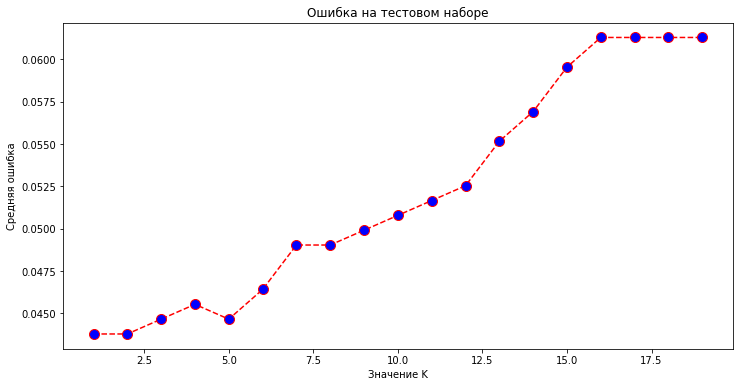

In [ ]:
# построение графика значений ошибок по отношению к значениям K
plt.figure(figsize=(12, 6))
plt.plot(k, error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10) 
plt.title('Ошибка на тестовом наборе') 
plt.xlabel('Значение K') 
plt.ylabel('Средняя ошибка')

In [ ]:
from sklearn import metrics
KNNmodel = KNeighborsClassifier(n_neighbors=2)
KNNmodel.fit(X_train, y_train)
y_pred = KNNmodel.predict(X_test)
#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Точность модели K-NN: {0:.2f}%".format(precision))

Точность модели K-NN: 95.62%


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) # матрица ошибок

array([[160,   0,   0,   0,   0,   0,   0],
       [  0, 129,  35,   0,   0,   0,   0],
       [  0,   0, 156,   0,   0,   0,   0],
       [  0,   0,   0, 164,   0,   0,   0],
       [  0,   0,   1,   0, 157,   8,   0],
       [  0,   0,   0,   0,   6, 160,   0],
       [  0,   0,   0,   0,   0,   0, 166]])

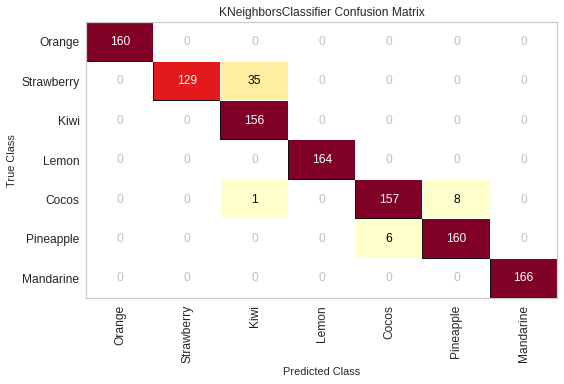

In [ ]:
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(KNNmodel, classes=fruits) # создаем объект диаграммы матрица ошибок модели
cm.fit(X_train, y_train) # обчучение модели
cm.score(X_test, y_test) # оценка модели
cm.show()